This notebook allows the reproduce **Figure 6** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Thomas Jacobs, Tom Ruttink and Bernard De Baets.

#### Load packages

In [1]:
using Random 
using Plots  
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP


(process:11404): GLib-GIO-WARNING **: 13:39:52.467: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


#### Load BioCCP- and simulation-based framework

In [2]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [3]:
Random.seed!(1)

TaskLocalRNG()

#### Study relation between expected combinatorial coverage and given plant library size 

In [4]:
include("DefaultParameters_k=2.jl");

- Figure 6A: expected combinatorial coverage w.r.t. plant library size

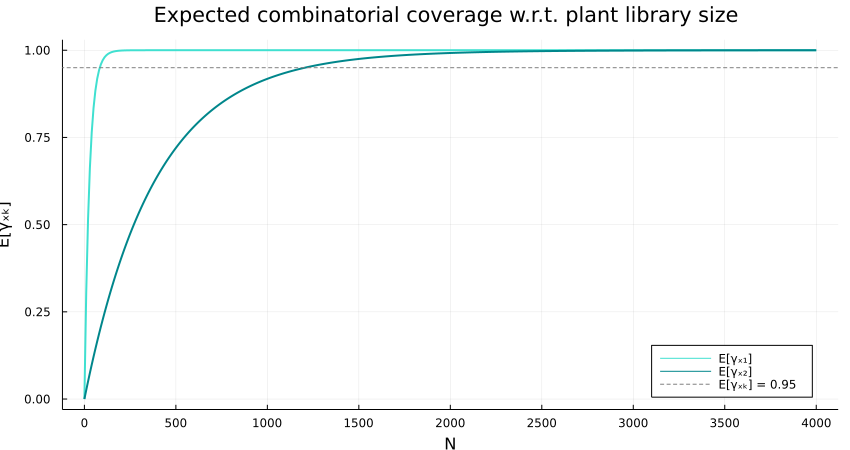

In [5]:
plant_library_sizes = 0:10:4000
expected_γₓ₂ = []
expected_γₓ₁ = []


for N in plant_library_sizes
    r = 2
    push!(expected_γₓ₂, BioCCP_γₓ₂(x, 
                                         N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
    
    r = 1
    push!(expected_γₓ₁, BioCCP_γₓ₁(x, 
                                         N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
end
 
plot(plant_library_sizes, expected_γₓ₁, label="E[γₓ₁]", color=:turquoise, linewidth=2)

plot!(plant_library_sizes, expected_γₓ₂,
label="E[γₓ₂]", title="Expected combinatorial coverage w.r.t. plant library size 
    ",
xlabel="N", ylabel="E[γₓₖ]", 
        xticks = (0:500:50000, string.(0:500:50000)),
 size=(850,450), color=:turquoise4, linewidth=2)
hline!([0.95], linestyle=:dash, color=:grey, label="E[γₓₖ] = 0.95", legend=:bottomright)

#### Study relation between probibility of full combinatorial coverage and given plant library size 

- Figure 6B: probability of full combinatorial coverage w.r.t. plant library size

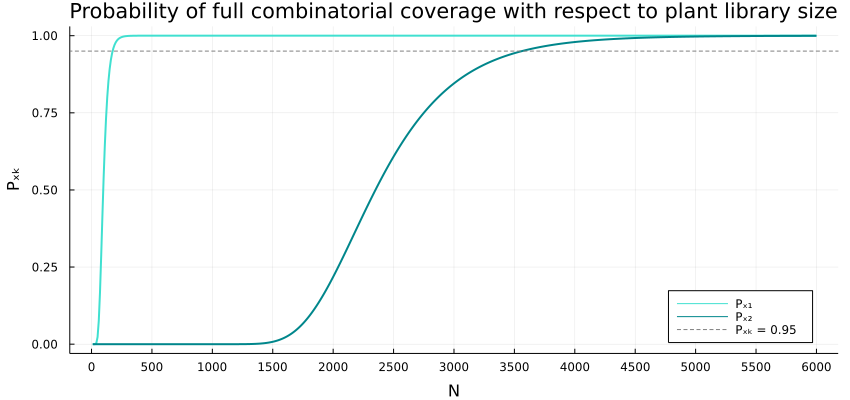

In [6]:
plant_library_sizes = 0:10:6000
Pₓ₁ = []
Pₓ₂ = []

for N in plant_library_sizes
    r = 2
    push!(Pₓ₂, BioCCP_Pₓ₂(x, 
                            N,
                            g, 
                            r, 
                            n_gRNA_total, 
                            p_gRNA_freq, 
                            p_gRNA_edit, 
                            ϵ_KO))
    
    r = 1
    push!(Pₓ₁, BioCCP_Pₓ₁(x, 
                            N,
                            g, 
                            r, 
                            n_gRNA_total, 
                            p_gRNA_freq, 
                            p_gRNA_edit, 
                            ϵ_KO))
end
 
plot(plant_library_sizes, Pₓ₁, label="Pₓ₁", color=:turquoise, linewidth=2)

plot!(plant_library_sizes, Pₓ₂, label="Pₓ₂", 
    title="Probability of full combinatorial coverage with respect to plant library size",
xlabel="N
    ", ylabel="
    Pₓₖ", 
        xticks = (0:500:50000, string.(0:500:50000)),
 size=(850,400), color=:turquoise4, linewidth=2)
hline!([0.95], linestyle=:dash, color=:grey, label="Pₓₖ = 0.95", legend=:bottomright)